In [6]:
# remove warning messages

import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
from sklearn import preprocessing
from IPython.display import display, HTML

train_df = pd.read_csv('train_features_no_dmg_resnet.csv')
val_df = pd.read_csv('val_features_no_dmg_resnet.csv')

#Verify weather we have missing values or not
for i in train_df.columns:
    print(i, ',', train_df[i].dtype,',',train_df[i].isnull().any())


0 , float64 , False
1 , float64 , False
2 , float64 , False
3 , float64 , False
4 , float64 , False
5 , float64 , False
6 , float64 , False
7 , float64 , False
8 , float64 , False
9 , float64 , False
10 , float64 , False
11 , float64 , False
12 , float64 , False
13 , float64 , False
14 , float64 , False
15 , float64 , False
16 , float64 , False
17 , float64 , False
18 , float64 , False
19 , float64 , False
20 , float64 , False
21 , float64 , False
22 , float64 , False
23 , float64 , False
24 , float64 , False
25 , float64 , False
26 , float64 , False
27 , float64 , False
28 , float64 , False
29 , float64 , False
30 , float64 , False
31 , float64 , False
32 , float64 , False
33 , float64 , False
34 , float64 , False
35 , float64 , False
36 , float64 , False
37 , float64 , False
38 , float64 , False
39 , float64 , False
40 , float64 , False
41 , float64 , False
42 , float64 , False
43 , float64 , False
44 , float64 , False
45 , float64 , False
46 , float64 , False
47 , float64 , False
48

In [8]:

X_train = train_df.iloc[:, :2047]
y_train = train_df.iloc[:, 2048:]
X_val = val_df.iloc[:, :2047]
y_val = val_df.iloc[:, 2048:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)



X_train shape: (13621, 2047)
y_train shape: (13621, 8)
X_val shape: (2824, 2047)
y_val shape: (2824, 8)


In [9]:
label_counts = y_train.sum().sort_values(ascending=False)
print(label_counts)

label_4    5804.0
label_3    3676.0
label_2    3190.0
label_1    2081.0
label_0    2000.0
label_7    1990.0
label_6    1753.0
label_5    1570.0
dtype: float64


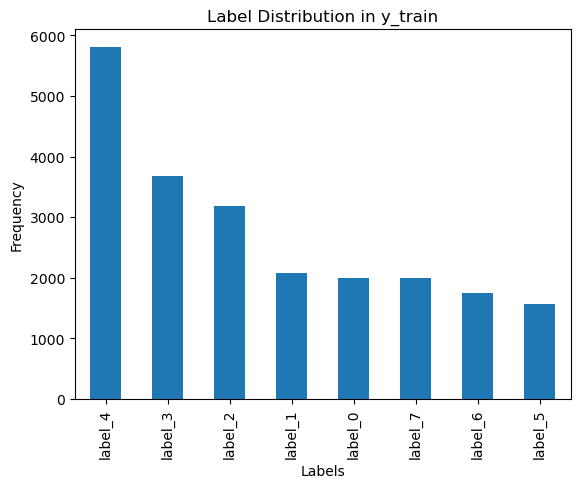

In [10]:
import matplotlib.pyplot as plt

label_counts.plot(kind='bar')
plt.title("Label Distribution in y_train")
plt.ylabel("Frequency")
plt.xlabel("Labels")
plt.show()

In [39]:
pip install scikit-multilearn


Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install liac-arff


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11729 sha256=664dcaee646aa536da78da479ee13e5868a347b47b65cbcf05d48b7c032c05a1
  Stored in directory: c:\users\preetham\appdata\local\pip\cache\wheels\a9\ac\cf\c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install smote-variants



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 34.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/151.1 MB ? eta -:--:--
   -- ------------------------------------- 10.0/151.1 MB 51.6 MB/s eta 0:00:03
   ----- ---------------------------------- 19.7/151.1 MB 47.8 MB/s eta 0:00:03
   ------- -------------------------------- 29.4/151.1 MB 47.7 MB/s eta 0:00:03
   ---------- ----------------------------- 40.9/151.1 MB 49.1 MB/s eta 0:00:03
   -------------- ------------------------- 53.5/151.1 MB 51.6 MB/s eta 0:00:02
   ----------------- ---------------------- 66.6/151.1 MB 53.1 MB/s eta 0:00:02
   --------------------- ------------------ 79.4/151.1 MB 53.9 MB/s eta 0:00:02
   ---------------

In [15]:
#Logistic Regression

import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

clf=OneVsRestClassifier(LogisticRegression(penalty='l2',solver='newton-cg', 
                      max_iter=1500))

clf=clf.fit(X_train, y_train)
y_pred=clf.predict(X_val)

confM = multilabel_confusion_matrix(y_val, y_pred)
print(confM)

acc=accuracy_score(y_val, y_pred)
F1=f1_score(y_val, y_pred,average='micro')
precicion = precision_score(y_val, y_pred, average='micro')
recall = recall_score(y_val, y_pred, average='micro', zero_division=0)
print('By hold-out evaluation: acc = ',acc, ',F1 = ',F1, 'precicion =  ' ,precicion , 'recall = ' , recall )
print("\nClassification Report:\n", classification_report(y_val, y_pred))



[[[2316    8]
  [  11  489]]

 [[2323   99]
  [ 143  259]]

 [[1960  205]
  [ 325  334]]

 [[1803  271]
  [ 342  408]]

 [[1312  370]
  [ 324  818]]

 [[2407   99]
  [ 206  112]]

 [[2392   52]
  [  88  292]]

 [[2312  106]
  [ 169  237]]]
By hold-out evaluation: acc =  0.426699716713881 ,F1 =  0.6766865534648921 precicion =   0.7090646790093773 recall =  0.6471362738643844

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       500
           1       0.72      0.64      0.68       402
           2       0.62      0.51      0.56       659
           3       0.60      0.54      0.57       750
           4       0.69      0.72      0.70      1142
           5       0.53      0.35      0.42       318
           6       0.85      0.77      0.81       380
           7       0.69      0.58      0.63       406

   micro avg       0.71      0.65      0.68      4557
   macro avg       0.71      0.64      0.67      4557
we

In [18]:
# === Imports ===
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    multilabel_confusion_matrix, classification_report
)

# === Data Splitting ===
X_train = train_df.iloc[:, :2047]
y_train = train_df.iloc[:, 2048:]
X_val = val_df.iloc[:, :2047]
y_val = val_df.iloc[:, 2048:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

# === Grid Search Setup ===
base_clf = LogisticRegression(solver='saga', max_iter=5000)
ovr = OneVsRestClassifier(base_clf)

param_grid = {
    'estimator__solver': ['newton-cg', 'lbfgs', 'sag'],
    'estimator__penalty': ['l1', 'l2'],
    
}

grid_search = GridSearchCV(
    estimator=ovr,
    param_grid=param_grid,
    scoring='f1_micro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# === Model Training ===
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

# === Evaluation ===
y_pred = best_model.predict(X_val)

confM = multilabel_confusion_matrix(y_val, y_pred)
print(confM)

acc = accuracy_score(y_val, y_pred)
F1 = f1_score(y_val, y_pred, average='micro')
precicion = precision_score(y_val, y_pred, average='micro')
recall = recall_score(y_val, y_pred, average='micro', zero_division=0)

print('By hold-out evaluation: acc = ', acc, ',F1 = ', F1, 
      'precicion = ', precicion, 'recall = ', recall)

print("\nClassification Report:\n", classification_report(y_val, y_pred))


X_train shape: (13621, 2047)
y_train shape: (13621, 8)
X_val shape: (2824, 2047)
y_val shape: (2824, 8)
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg'}
[[[2316    8]
  [  11  489]]

 [[2323   99]
  [ 143  259]]

 [[1960  205]
  [ 325  334]]

 [[1803  271]
  [ 342  408]]

 [[1312  370]
  [ 324  818]]

 [[2407   99]
  [ 206  112]]

 [[2392   52]
  [  88  292]]

 [[2312  106]
  [ 169  237]]]
By hold-out evaluation: acc =  0.426699716713881 ,F1 =  0.6766865534648921 precicion =  0.7090646790093773 recall =  0.6471362738643844

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       500
           1       0.72      0.64      0.68       402
           2       0.62      0.51      0.56       659
           3       0.60      0.54      0.57       750
           4       0.69      0.72      0.70      1142
           5       0.53      0

In [29]:
#Random Forest

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


bag = RandomForestClassifier(n_estimators=100, max_samples=0.8, random_state=1)

clf=bag.fit(X_train, y_train)
y_pred=clf.predict(X_val)

confM = multilabel_confusion_matrix(y_val, y_pred)
print(confM)

acc=accuracy_score(y_val, y_pred)
F1=f1_score(y_val, y_pred,average='micro')
precicion = precision_score(y_val, y_pred, average='micro')
recall = recall_score(y_val, y_pred, average='micro', zero_division=0)
print('By hold-out evaluation: acc = ',acc, ',F1 = ',F1, 'precicion =  ' ,precicion , 'recall = ' , recall )
print("\nClassification Report:\n", classification_report(y_val, y_pred))


[[[2310   14]
  [  49  451]]

 [[2415    7]
  [ 306   96]]

 [[2157    8]
  [ 623   36]]

 [[2043   31]
  [ 664   86]]

 [[1311  371]
  [ 321  821]]

 [[2506    0]
  [ 318    0]]

 [[2442    2]
  [ 272  108]]

 [[2410    8]
  [ 311   95]]]
By hold-out evaluation: acc =  0.33640226628895187 ,F1 =  0.506052906889852 precicion =   0.7933458294283037 recall =  0.3715163484748738

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       500
           1       0.93      0.24      0.38       402
           2       0.82      0.05      0.10       659
           3       0.74      0.11      0.20       750
           4       0.69      0.72      0.70      1142
           5       0.00      0.00      0.00       318
           6       0.98      0.28      0.44       380
           7       0.92      0.23      0.37       406

   micro avg       0.79      0.37      0.51      4557
   macro avg       0.76      0.32      0.39      4557
w

In [30]:
#MLPCLASSIFIER

from sklearn.neural_network import MLPClassifier

mlp = OneVsRestClassifier(MLPClassifier(
    hidden_layer_sizes=(100, 50), activation='relu',solver='adam',alpha=0.0001, batch_size='auto',learning_rate='adaptive',max_iter=200,random_state=1))
clf=mlp.fit(X_train, y_train)
y_pred=clf.predict(X_val)

confM = multilabel_confusion_matrix(y_val, y_pred)
print(confM)

acc=accuracy_score(y_val, y_pred)
F1=f1_score(y_val, y_pred,average='micro')
precicion = precision_score(y_val, y_pred, average='micro')
recall = recall_score(y_val, y_pred, average='micro', zero_division=0)
print('By hold-out evaluation: acc = ',acc, ',F1 = ',F1, 'precicion =  ' ,precicion , 'recall = ' , recall )
print("\nClassification Report:\n", classification_report(y_val, y_pred))


[[[2313   11]
  [   8  492]]

 [[2378   44]
  [ 191  211]]

 [[1891  274]
  [ 271  388]]

 [[1789  285]
  [ 341  409]]

 [[1337  345]
  [ 373  769]]

 [[2238  268]
  [ 167  151]]

 [[2381   63]
  [  78  302]]

 [[2317  101]
  [ 149  257]]]
By hold-out evaluation: acc =  0.42492917847025496 ,F1 =  0.6674134647697995 precicion =   0.6816933638443936 recall =  0.6537195523370638

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       500
           1       0.83      0.52      0.64       402
           2       0.59      0.59      0.59       659
           3       0.59      0.55      0.57       750
           4       0.69      0.67      0.68      1142
           5       0.36      0.47      0.41       318
           6       0.83      0.79      0.81       380
           7       0.72      0.63      0.67       406

   micro avg       0.68      0.65      0.67      4557
   macro avg       0.70      0.65      0.67      4557


In [16]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

xgb = OneVsRestClassifier(XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=1, 
    random_state=42,
    n_jobs=-1,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=1000
))

clf=xgb.fit(X_train, y_train)
y_pred=clf.predict(X_val)

confM = multilabel_confusion_matrix(y_val, y_pred)
print(confM)

acc=accuracy_score(y_val, y_pred)
F1=f1_score(y_val, y_pred,average='micro')
precicion = precision_score(y_val, y_pred, average='micro')
recall = recall_score(y_val, y_pred, average='micro', zero_division=0)
print('By hold-out evaluation: acc = ',acc, ',F1 = ',F1, 'precicion =  ' ,precicion , 'recall = ' , recall )
print("\nClassification Report:\n", classification_report(y_val, y_pred))


[[[2308   16]
  [  14  486]]

 [[2384   38]
  [ 167  235]]

 [[2064  101]
  [ 389  270]]

 [[1946  128]
  [ 391  359]]

 [[1358  324]
  [ 281  861]]

 [[2479   27]
  [ 262   56]]

 [[2422   22]
  [ 106  274]]

 [[2381   37]
  [ 199  207]]]
By hold-out evaluation: acc =  0.4730878186968839 ,F1 =  0.687171792948237 precicion =   0.7986050566695728 recall =  0.6030283080974326

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       500
           1       0.86      0.58      0.70       402
           2       0.73      0.41      0.52       659
           3       0.74      0.48      0.58       750
           4       0.73      0.75      0.74      1142
           5       0.67      0.18      0.28       318
           6       0.93      0.72      0.81       380
           7       0.85      0.51      0.64       406

   micro avg       0.80      0.60      0.69      4557
   macro avg       0.81      0.58      0.65      4557
we

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    multilabel_confusion_matrix, accuracy_score,
    f1_score, precision_score, recall_score,
    classification_report
)

# Base classifier
base_xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=1,
    random_state=42,
    n_jobs=-1
)

# Wrap with OneVsRest
xgb = OneVsRestClassifier(base_xgb)

# Define parameter grid (params inside the estimator use __ syntax)
param_grid = {
    'estimator__learning_rate': [0.05, 0.1],
    'estimator__max_depth': [4, 6, 8],
   
}

# Grid search with 3-fold CV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_micro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_val)

# Evaluation
confM = multilabel_confusion_matrix(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
F1 = f1_score(y_val, y_pred, average='micro')
precision = precision_score(y_val, y_pred, average='micro')
recall = recall_score(y_val, y_pred, average='micro', zero_division=0)

# Output
print("Best Parameters: ", grid_search.best_params_)
print("By hold-out evaluation:")
print("Accuracy = ", acc)
print("F1 Score = ", F1)
print("Precision = ", precision)
print("Recall = ", recall)
print("\nMultilabel Confusion Matrix:\n", confM)
print("\nClassification Report:\n", classification_report(y_val, y_pred))
